### Consumption Smoothing Models

Seho Jeong, Sogang University

References:
- Kwak, Jun Hee. 2025. "Lectures on Macroeconomics." Sogang University.
- Sargent, Thomas J. and John Stachurski. n.d. "Consumption Smoothing." A First Course in Quantitative Economics with Python. https://intro.quantecon.org/cons_smooth.html

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
jax.config.update('jax_enable_x64', True)

#### Finite-Horizon Consumption-Savings Model

We assume CRRA utility here.

In [20]:
# Set parameters.

T = 60       # planning horizon
β = 0.96     # discount factor
r = 0.02     # interest rate
σ = 2.0      # CRRA coefficient
w = 1.0      # constant labor income
a_min = 0.0  # asset lower bound (= 0 for no borrowing)
a_max = 20.0 # asset upper bound
a_num = 801  # number of grid points for asset

# Set grids.
a_grid = np.linspace(a_min, a_max, a_num)                  # asset grid
a_now, a_next = np.meshgrid(a_grid, a_grid, indexing='ij') # broadcast

# Define utility.
u = lambda c: np.where(c > 0, (c ** (1 - σ)) / (1 - σ), -np.inf) if σ != 1 else np.where(c > 0, np.log(c), -np.inf)

# Initialize the value function and policy functions.
V = np.empty((T + 1, a_num))
c_policy = np.empty((T, a_num))
a_policy = np.empty((T, a_num))

# Terminal period: Consume everything.
c_T = (1 + r) * a_grid + w
V[T, :] = u(c_T)

# BACKWARD INDUCTION
for t in range(T-1, -1, -1):

    # resources today for each current asset
    res_now = (1 + r) * a_now + w

    # consumption matrix for every (a_t, a_{t+1}) pair
    c = res_now - a_next

    # period utility + discounted continuation value
    utility = u(c) + β ** (t + 1) * V[t+1]
    
    # Pick the best next-period index for each a_t.
    best_idx = np.argmax(utility, axis=1)

    # Store objects of interest.
    V[t, :] = utility[np.arange(a_num), best_idx]
    a_policy[t, :] = a_grid[best_idx]
    c_policy[t, :] = res_now[np.arange(a_num), best_idx] - a_policy[t, :]

/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_2548/19613428.py:17: RuntimeWarning: divide by zero encountered in reciprocal
  u = lambda c: np.where(c > 0, (c ** (1 - σ)) / (1 - σ), -np.inf) if σ != 1 else np.where(c > 0, np.log(c), -np.inf)


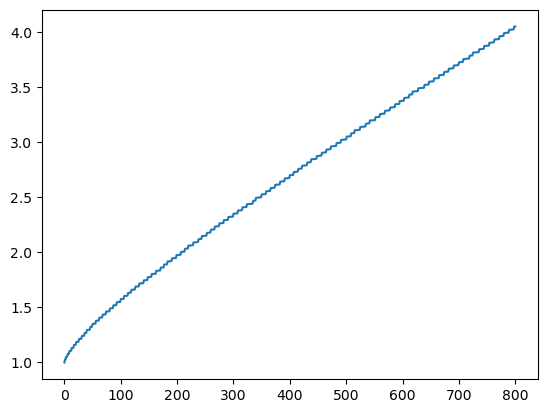

In [24]:
plt.plot(c_policy[0, :])

#### Infinite-Horizon Consumption-Savings Model

#### Consumption-Savings Model with Simple Borrowing Constraints